## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1.1
- Regression predicts a number, while classification predicts a category.

1.2
- A confusion table compares model predictions with actual values. It helps us understand how many predictions were correct or incorrect for each category.

1.3
- The SSE quantifies how far off the model's predictions are from the true values.

1.4
- Overfitting is when a model learns the training dataset too well, so it fails when new data is applied. Underfitting is when a model is too simple and it misses patterns in the data.

1.5
- Splitting data helps check if the model will work on future, unseen data. Choosing a k value by testing different k values on the test set allows for the one that generalizes best to be selected.

1.6
- The strengths for class label is that it gives a clear descision, but a weakness is that there is no confidence level.
- The strengths for for probability distribution is that it shows the confidence for each class, but a weakness is that it can be harder to interpret.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Saving USA_cars_datasets.csv to USA_cars_datasets.csv
User uploaded file "USA_cars_datasets.csv" with length 279432 bytes


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('USA_cars_datasets.csv')
df = data[['price', 'year', 'mileage']]
print(df.head())
print(df.shape)
print(df.isna().sum())

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
price      0
year       0
mileage    0
dtype: int64


/tmp/ipython-input-3725031699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])


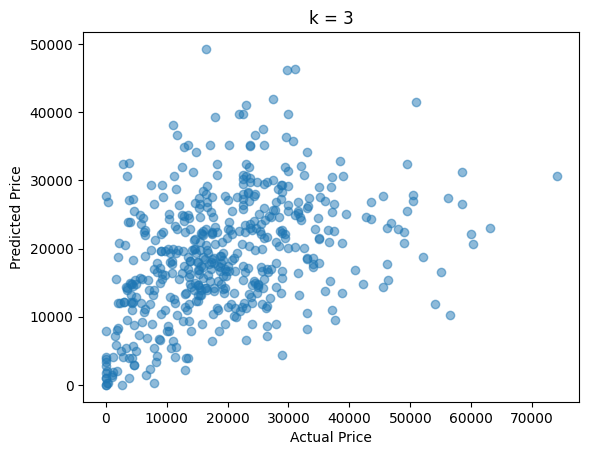

k = 3, MSE = 148065935.51955554


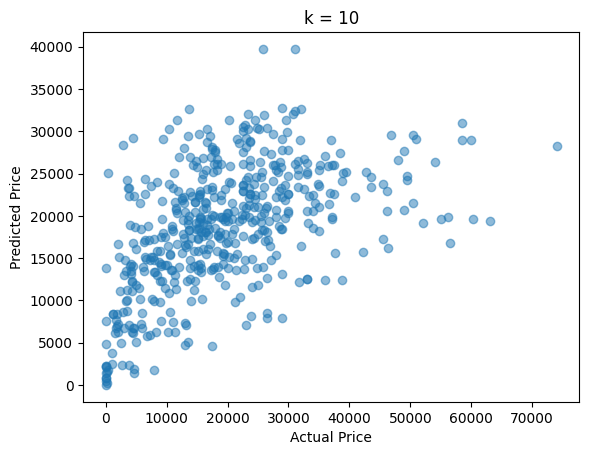

k = 10, MSE = 117399126.10604002


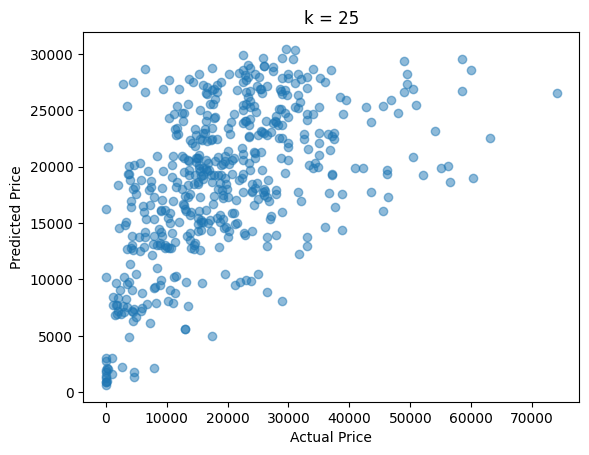

k = 25, MSE = 112576160.82390079


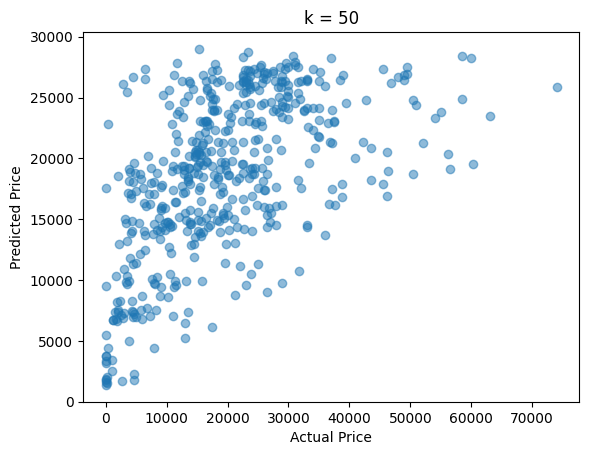

k = 50, MSE = 110202549.3014296


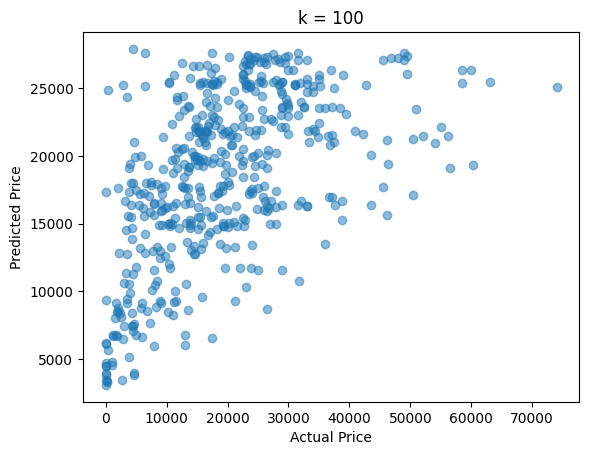

k = 100, MSE = 112253702.9700672


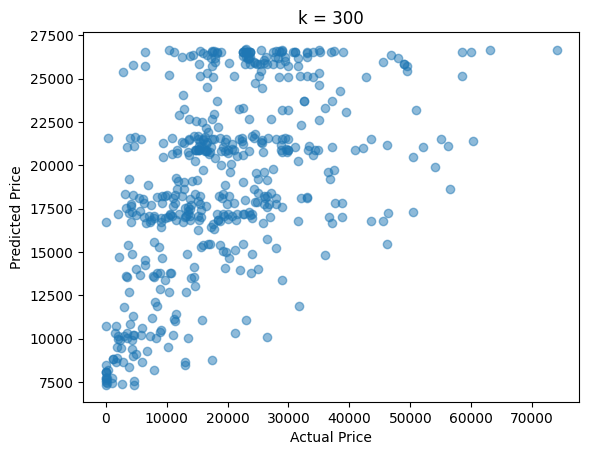

k = 300, MSE = 114496092.28682345
Best k: 50


In [3]:
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

X = df[['year', 'mileage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'k = {k}')
    plt.show()

    print(f'k = {k}, MSE = {mse}')

best_k = k_values[np.argmin(mse_values)]
print(f'Best k: {best_k}')

2.4
- When k is small, the predictions on the scatterplot are scattered and jump around. Some points match well, but others are futher off. When it increases the predictions are visibly "smoother" and line up more in a straight line. When it is large, the points are in a more similar range.

2.6
- The small k plot (k=3), showed predictions that were pretty widely scattered, which is overfitting. The medium range of plots the predictions became more of a diagonal line, so the model was more flexible. The plot showed the prices clustered around the average price, aka underfitting. The model was more simple, so it wouldn't predict high or low prices. The optimal k is the one where the mean squared error is lowest and the predictions match the actual prices without being too broad or too flat.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [7]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

data = pd.read_csv('zoo.csv')
print(data['class'].value_counts())
print(data.head())

for i in range(1, 8):
    animals = data[data['class'] == i]['animal'].tolist()
    print(f"Class {i} ({len(animals)} animals): {animals[:5]}")
    print()

Saving zoo.csv to zoo (3).csv
User uploaded file "zoo (3).csv" with length 4256 bytes
class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64
     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
2         1         0         0     1     0     1         0        0      4  
3         1         1      

In [11]:
X = data.drop(['class', 'animal'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

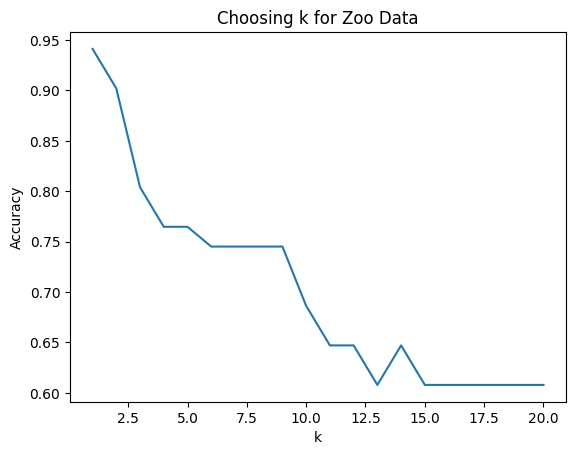

Best k = 1


In [12]:
accuracy = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Choosing k for Zoo Data')
plt.show()

best_k = k_range[np.argmax(accuracy)]
print(f'Best k = {best_k}')

3.3
- To choose k, test k from numbers 1 to 20. You must pick the value with the highest accuracy on the test set. Typically k=1 involves over fitting and a large k can be prone to underfitting.

In [13]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i != j and conf_matrix[i, j] > 0:
            print(f'Class {i+1} → Class {j+1}: {conf_matrix[i, j]} misclassifications')

Confusion Matrix:
[[24  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  1  1  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  4]]
Accuracy: 0.94
Class 3 → Class 4: 1 misclassifications
Class 3 → Class 5: 1 misclassifications
Class 7 → Class 6: 1 misclassifications


3.4
- The accuracy tells us tht the model is good overall and that class 1, 2, 4, 5, and 6 have 100% correct predictions. Only three mistakes were present in the set, which happened in this case because reptiles, fish, and amphibians share similar traits. Insects and invertebrates also have similar traits. It seems that the model has issues when animals in differnt classes have overlapping features. Ultimately, confusion tables show us where the model is confused and this helps us understand the limitations.

In [16]:
X_small = data[['milk', 'aquatic', 'airborne']]
y = data['class']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_small, y, test_size=0.5, random_state=42)

model_small = KNeighborsClassifier(n_neighbors=best_k)
model_small.fit(X_train_s, y_train_s)
y_pred_s = model_small.predict(X_test_s)

conf_matrix_s = confusion_matrix(y_test_s, y_pred_s)
print("Confusion Matrix (3 features):")
print(conf_matrix_s)

probs = model_small.predict_proba(X_test_s)
print("Predicted class probabilities (first 5 rows):")
print(probs[:5])
print("Unique classes predicted:", np.unique(y_pred_s))

Confusion Matrix (3 features):
[[24  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  1  0  0  2]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  3  0  0  2]]
Predicted class probabilities (first 5 rows):
[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
Unique classes predicted: [1 2 4 7]


3.5
- This one shows us more mistakes:
  
  Class 3 (reptiles) → Class 4 (fish) and Class 7

    Class 5 (amphibians) → Class 4

  Class 6 (insects) → Class 2 (birds)

  Class 7 (invertebrates) → Class 4

as well as the probability output showing us that the model is overconfident but also missing most classes. The takeaway here is that using too little features leads to underfitting where the model is unable to distinguish most classes. It only predicts classes that have unique values in the binary features.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def my_kde(data, kernel='gaussian', bandwidth=None, grid_points=200):
    data = np.array(data).reshape(-1, 1)

    if bandwidth is None:
        n = len(data)
        std = np.std(data)
        bandwidth = 1.06 * std * (n ** (-0.2))

    x_min = data.min() - 3 * bandwidth
    x_max = data.max() + 3 * bandwidth
    x_grid = np.linspace(x_min, x_max, grid_points).reshape(-1, 1)

    distances = cdist(x_grid, data, metric='euclidean') / bandwidth

    if kernel == 'gaussian':
        k = np.exp(-0.5 * distances ** 2) / np.sqrt(2 * np.pi)
    elif kernel == 'uniform':
        k = np.where(np.abs(distances) <= 1, 0.5, 0)
    elif kernel == 'epanechnikov':
        k = np.where(np.abs(distances) <= 1, 0.75 * (1 - distances ** 2), 0)
    else:
        raise ValueError("Use 'gaussian', 'uniform', or 'epanechnikov'")

    kde = np.mean(k, axis=1) / bandwidth

    plt.plot(x_grid, kde, label=f'My KDE ({kernel})')
    plt.hist(data, bins=20, density=True, alpha=0.3, color='gray', label='Histogram')
    plt.legend()
    plt.show()

    return x_grid, kde

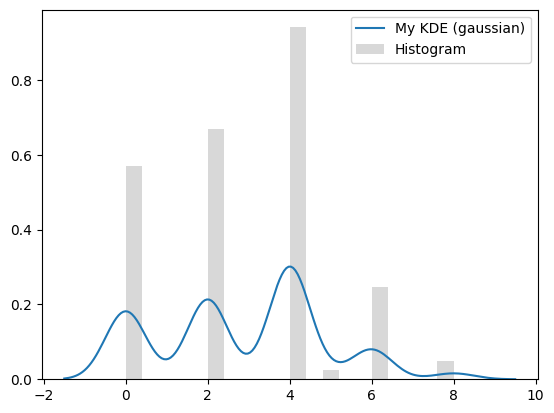

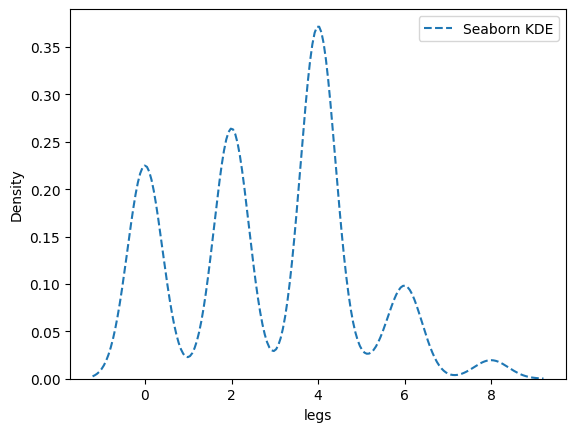

In [8]:
import pandas as pd
from google.colab import files

try:
    with open('zoo.csv', 'r') as f:
        pass
except FileNotFoundError:
    print('zoo.csv not found, upload it.')
    uploaded = files.upload()
    for fn in uploaded.keys():
        print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

data = pd.read_csv('zoo.csv')
legs_data = data['legs']
x_grid, kde = my_kde(legs_data, kernel='gaussian', bandwidth=0.5)
import seaborn as sns
sns.kdeplot(legs_data, bw_adjust=0.5, label='Seaborn KDE', linestyle='--')
plt.legend()
plt.show()

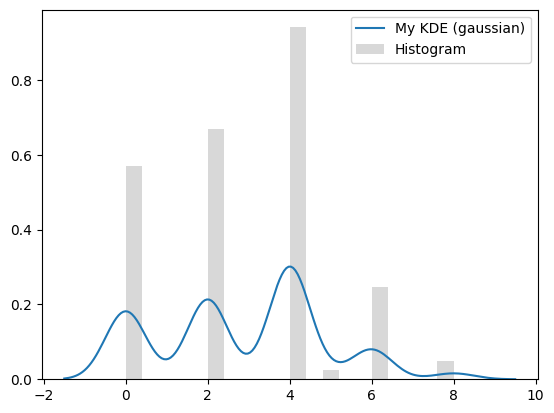

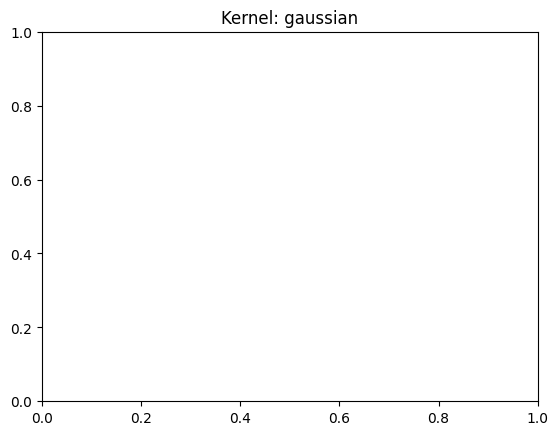

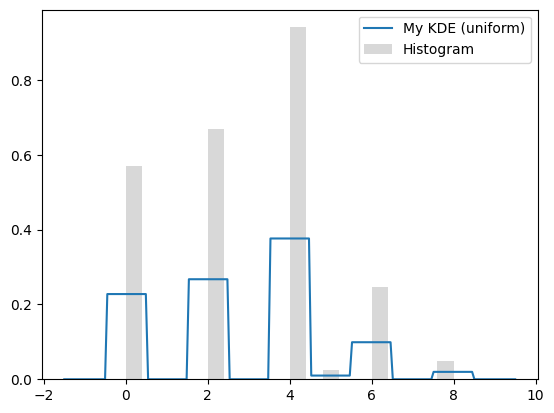

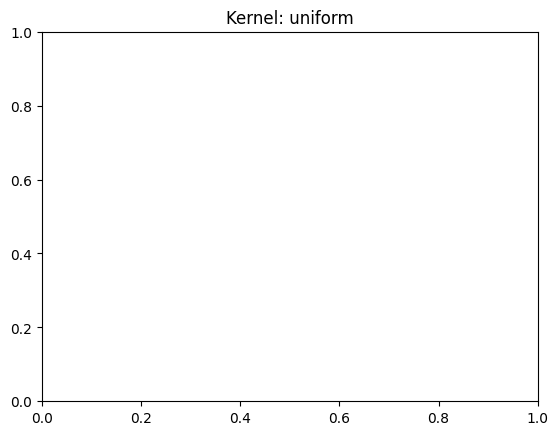

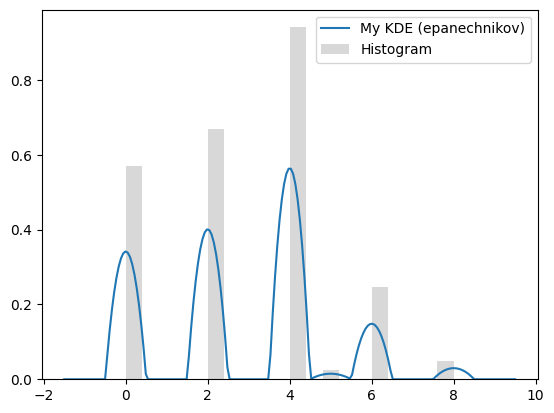

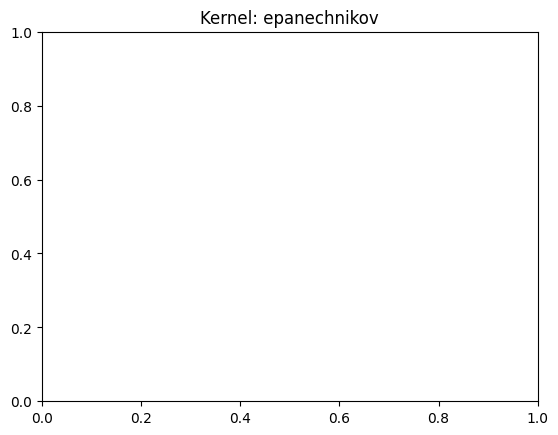

In [9]:
kernels = ['gaussian', 'uniform', 'epanechnikov']
for k in kernels:
    my_kde(legs_data, kernel=k, bandwidth=0.5)
    plt.title(f'Kernel: {k}')
    plt.show()